In [1]:
#https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("online_shoppers_intention.csv")

In [2]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Data Balancing

In [3]:
from time import process_time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [33]:
#Identify categorical attributes
categorical_features = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]
df_cat = df[categorical_features]

df_onehot = pd.get_dummies(df, columns = categorical_features, prefix = categorical_features)

#Tranform categorical attributes
label_encoder = LabelEncoder()
df_onehot['Revenue'] = label_encoder.fit_transform(df['Revenue'])

Identifying and transforming categorical attributes

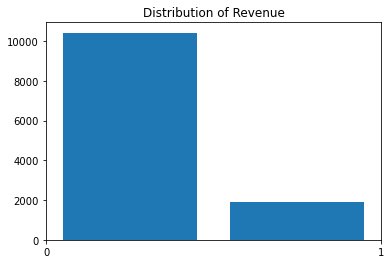

In [21]:
plt.hist(df_onehot['Revenue'], bins = 2, rwidth = 0.8, align = 'mid')
plt.xticks(np.arange(0,2,1))
plt.title("Distribution of Revenue")
plt.show()

In [5]:
#Specify independent/ dependent values
X = df_onehot.drop(columns = "Revenue")
y = df_onehot["Revenue"]

#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Imbalanced, Raw Dataset

In [6]:
#Initialize the DecisionTreeClassifier
tree_raw_imbalanced = DecisionTreeClassifier(criterion = "entropy")

#Time Measurement
start_time = process_time()

#Fit the Classifier to the data
tree_raw_imbalanced.fit(X_train, y_train)

#Predict new Data
y_pred = tree_raw_imbalanced.predict(X_test)

#Time Measurement
end_time = process_time()

#Results
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
time = end_time - start_time
print(cr)
print(cm)
print(time)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3139
           1       0.53      0.57      0.55       560

    accuracy                           0.86      3699
   macro avg       0.72      0.74      0.73      3699
weighted avg       0.86      0.86      0.86      3699

[[2853  286]
 [ 243  317]]
0.046875


Undersampling on Raw Dataset

In [9]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [17]:
#Undersampling
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

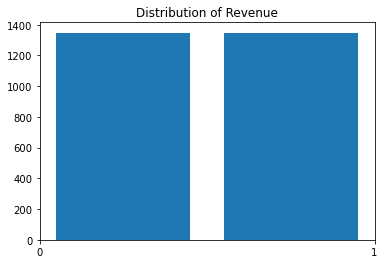

In [18]:
plt.hist(y_train_rus, bins = 2, rwidth = 0.8, align = 'mid')
plt.xticks(np.arange(0,2,1))
plt.title("Distribution of Revenue")
plt.show()

In [19]:
#Initialize the DecisionTreeClassifier
tree_raw_imbalanced = DecisionTreeClassifier(criterion = "entropy")

#Time Measurement
start_time = process_time()

#Fit the Classifier to the data
tree_raw_imbalanced.fit(X_train_rus, y_train_rus)

#Predict new Data
y_pred = tree_raw_imbalanced.predict(X_test)

#Time Measurement
end_time = process_time()

#Results
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
time = end_time - start_time
print(cr)
print(cm)
print(time)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      3139
           1       0.40      0.82      0.54       560

    accuracy                           0.79      3699
   macro avg       0.68      0.80      0.70      3699
weighted avg       0.88      0.79      0.81      3699

[[2448  691]
 [ 100  460]]
0.046875


Oversampling on Raw Dataset

In [25]:
#Oversampling
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

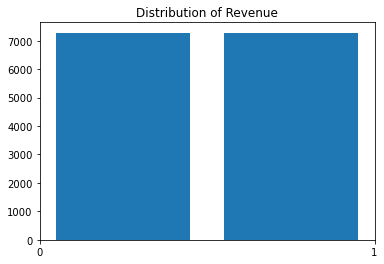

In [23]:
plt.hist(y_train_ros, bins = 2, rwidth = 0.8, align = 'mid')
plt.xticks(np.arange(0,2,1))
plt.title("Distribution of Revenue")
plt.show()

In [24]:
#Initialize the DecisionTreeClassifier
tree_raw_imbalanced = DecisionTreeClassifier(criterion = "entropy")

#Time Measurement
start_time = process_time()

#Fit the Classifier to the data
tree_raw_imbalanced.fit(X_train_ros, y_train_ros)

#Predict new Data
y_pred = tree_raw_imbalanced.predict(X_test)

#Time Measurement
end_time = process_time()

#Results
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
time = end_time - start_time
print(cr)
print(cm)
print(time)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3139
           1       0.52      0.55      0.53       560

    accuracy                           0.86      3699
   macro avg       0.72      0.73      0.72      3699
weighted avg       0.86      0.86      0.86      3699

[[2857  282]
 [ 254  306]]
0.09375


In [27]:
#SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

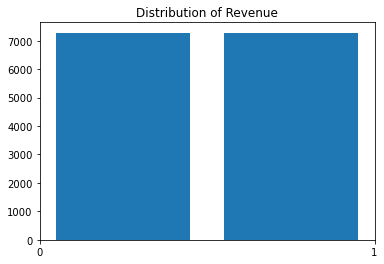

In [28]:
plt.hist(y_train_smote, bins = 2, rwidth = 0.8, align = 'mid')
plt.xticks(np.arange(0,2,1))
plt.title("Distribution of Revenue")
plt.show()

In [32]:
#Initialize the DecisionTreeClassifier
tree_raw_imbalanced = DecisionTreeClassifier(criterion = "entropy")

#Time Measurement
start_time = process_time()

#Fit the Classifier to the data
tree_raw_imbalanced.fit(X_train_smote, y_train_smote)

#Predict new Data
y_pred = tree_raw_imbalanced.predict(X_test)

#Time Measurement
end_time = process_time()

#Results
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
time = end_time - start_time
print(cr)
print(cm)
print(time)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3139
           1       0.53      0.57      0.55       560

    accuracy                           0.86      3699
   macro avg       0.73      0.74      0.73      3699
weighted avg       0.86      0.86      0.86      3699

[[2858  281]
 [ 242  318]]
0.109375


In [ ]:
Conclusion > SMOTE oversampling leads to increased precision, recall, f1-score when predicting successfull purchases
